## <center>HW3 - Business Data Science (MIS382N)</center>
### <center>Submitted by Prajval Gupta and Subhayu Chakravarty</center>

## Problem 1: Ridge Regression and Co-linearity


### Q2: What is the test error of the “zero-variance” solution, namely, the all-zeros solution?

Since, it is a zero-variance solution $$\hat\beta \rightarrow 0$$<br>
Therefore, the $$Test Error = \sum_{i=0}^{n}(y_{i}-h(x_{i}))^2$$<br>
            $$ = \sum_{i=0}^{n}(\beta_{0} + \beta*X + e - \hat\beta_{0} - \hat\beta*X )^{2}$$ 
            $$ = \sum_{i=0}^{n}(\beta.X + e)^{2}$$

In [96]:
#Import Statements
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [20]:
p = 5; n = 500
X = np.random.randn(n,p)
c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
# c is a column that is approximately a linear combination of
# columns 1, 2, 3 and 4. We set the 5th column of X equal to c
X[:,p-1] = c
beta = np.array([1,1,1,1,0])
sigma = 0.3333
y = np.dot(X,beta) + sigma*np.random.randn(n)

# Now let's also generate a test data set
n1 = 150 # number of testing points
X_test = np.random.randn(n1,p)
c_test = np.dot(X_test[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n1)/1000;
X_test[:,p-1] = c_test
y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)
Z = np.dot(X.T,X)
beta_hat = np.array([0,0,0,0,0])
print("Test Error for the true \u03B2 = "+ str(np.linalg.norm(np.dot(X_test,beta) - y_test)))
print("Test Error for the empirical \u03B2 (i.e. all-zeros solution) = "+ str(np.linalg.norm(np.dot(X_test,beta_hat) - y_test)))

Test Error for the true β = 4.1754397755861685
Test Error for the empirical β (i.e. all-zeros solution) = 22.30480534983698


### Q2: The  least-squares  solution  does  not  seem  to  do  too  well,  because  it  has  so  much  variance. Still, it is unbiased.  Show this empirically:  generate many copies of the data, and for each one, obtain the least-squares solution.  Average these, to show that while each run produces a beta hat that is very different, their average begins to look more and more like the true beta.

We generate 1000 data points using random variable sampled from a gaussian distribution with with mean=0, variance=1<br> We run the experiment for 500 times and then average the $\hat\beta$ values over the experiments<br>
In this case, our true $\beta = [1,4,7,10,0]$ 

In [65]:
beta_hat_list = []
X_acc = []
y_acc = []
beta = np.array([1,4,7,10,0])
sigma = 0.333
n = 1000
p=5
for i in range(500):
    X_set = np.random.randn(n,p)
    c = np.dot(X_set[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000
    X_set[:,p-1] = c
    y = np.dot(X_set,beta) + sigma*np.random.randn(n)
    Z = np.dot(X_set.T,X_set)
    beta_hat = np.dot(np.dot(np.linalg.inv(Z),X_set.T),y.T)
    beta_hat_list.append(beta_hat)
    X_acc.append(X_set)
    y_acc.append(y)  

print("The mean values of Empirical \u03B2 after 500 experiments is :")
print("\u03B2\u0302 = "+ str(np.mean(beta_hat_list,0)))

The mean values of Empirical β after 500 experiments is :
β̂ = [0.79249382 3.68914711 7.10338842 9.94754757 0.10355731]


###### We can clearly observe that after the 500 experiments, the empirical values of the $\beta$ i.e. $\hat\beta \rightarrow \beta$ 

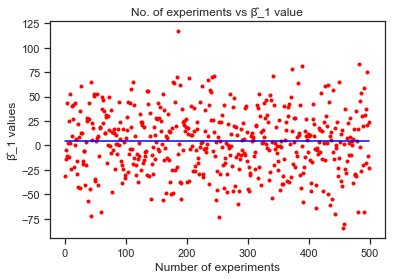

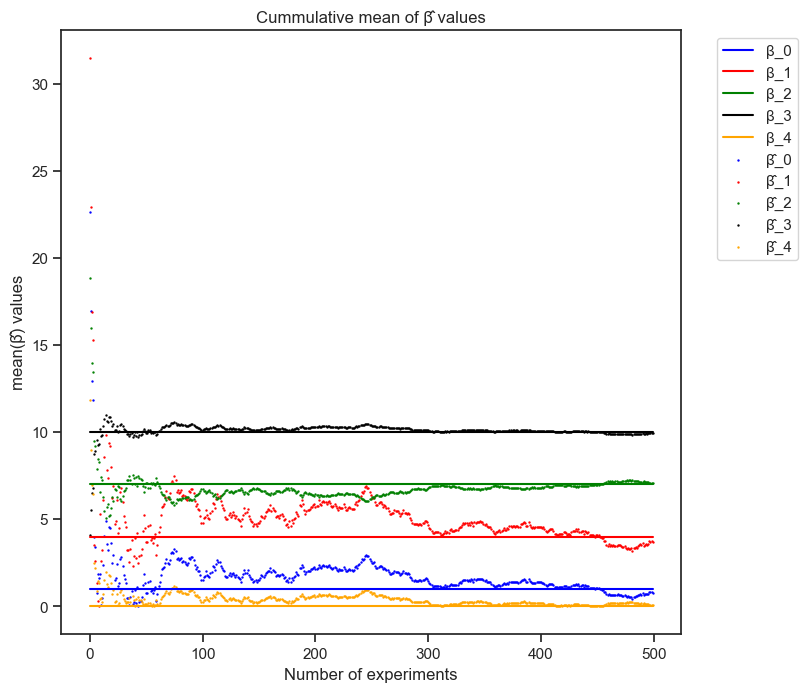

In [84]:
beta_plot = [i[1] for i in beta_hat_list]
beta_hat_cummean = [np.abs(np.mean(beta_plot[0:i+1])) for i in range(len(beta_plot))]

plt.title("No. of experiments vs \u03B2\u0302_1 value")
plt.scatter(range(500), beta_plot, marker = '.', color="red")
plt.plot(range(500), [beta[1] for w in range(500)], color="blue")
plt.xlabel("Number of experiments")
plt.ylabel("\u03B2\u0302_1 values")
plt.show()

colors = ["blue","red","green","black","orange"]
plt.figure(figsize=(8,8), dpi=100)
for i in range(len(beta)):
    plt.scatter(range(500), [np.abs(np.mean([j[i] for j in beta_hat_list][0:w+1]))\
                             for w in range(len(beta_plot))], marker = '.', s=2,color=colors[i], label=str("\u03B2\u0302"+"_"+str(i)))
    plt.plot(range(500), [beta[i] for w in range(500)], color=colors[i], label=str("\u03B2"+"_"+str(i)))
plt.title("Cummulative mean of \u03B2\u0302 values")
plt.xlabel("Number of experiments")
plt.ylabel("mean(\u03B2\u0302) values")
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1))
plt.show()

### Q4: Alternatively, if one had access to lots of data, instead of computing the least-square solutionover smaller batches and then averaging these solutions as in the previous part of the problem, an approach is to run a single least-squares regression over all the data.  Which approach do you think is better?  Can you support your conclusion with experiments?

The previous question shows how the mean of empirical $\beta$ calculated for each of the 500 experiments individually, leads to the true $\beta$.<br>
In this question, we stack the data points of all 500 experiments and compute the empirical $\beta$ by running regression on the complete data together, where the true $\beta = [1,4,7,10,0]$

In [87]:
#Lets stack the data points of all 500 experiments and run the regression in one go
X_new = np.vstack(X_acc)
Y_new = np.hstack(y_acc)
print(X_new.shape, Y_new.shape)

(500000, 5) (500000,)


In [90]:
Z = np.dot(X_new.T,X_new)
beta_hat_1 = np.dot(np.dot(np.linalg.inv(Z),X_new.T),Y_new.T)
print("The value of Empirical \u03B2 after stacking data points of each of the 500 experiments is :")
print(beta_hat)

The value of Empirical β after stacking data points of each of the 500 experiments is :
[0.84245167 3.76406137 7.07844076 9.95999516 0.07860536]


Though, the values may seem to look like leading to the true $\beta$ still its better to run the regression on small batches than on the complete dataset. To verify this, lets calculate the test error for both the empirical beta values i.e. for single and for batch

In [95]:
n1 = 100000 # number of testing points
p=5
beta = np.array([1,4,7,10,0])
sigma = 0.333
X_test = np.random.randn(n1,p)
c_test = np.dot(X_test[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n1)/1000;
X_test[:,p-1] = c_test
y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)
print("Test Error for the empirical \u03B2 in single run = "+ str(np.linalg.norm(np.dot(X_test,beta_hat_1) - y_test)))
print("Test Error for the empirical \u03B2 in small batches = "+ str(np.linalg.norm(np.dot(X_test,np.mean(beta_hat_list,0)) - y_test)))

Test Error for the empirical β in single run = 105.41674259588986
Test Error for the empirical β in small batches = 105.41659294570584


Though the test error is almost similar but it is less in the case of empirical $\beta$ calculated in small batches. So, it is better to compute the least-square solution over small batches. The mathematical explaination for the same is described below:<br>

For running in small batches (d experiments) : $$Var(mean(\hat\beta)) = 1/d^{2}\sum_{i=1}^{d}Var(\hat\beta_{i})$$
$$ = 1/(n.d^{2})$$
For a single run: $$Var(\hat\beta) = 1/(n.d)$$ i.e. clearly greater than $Var(mean(\hat\beta))$ i.e. over small batches

## Problem 2: Starting in Kaggle

On October 22nd, we are opening a Kaggle competition made for this class.
In that one, you willbe participating on your own. This is an intro to get us started, and also an excuse to work with regularization and regression which we have been discussing.
1.  Let’s start with our first Kaggle submission in a playground regression competition.  Make an account to Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques/
2.  Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models.  Then run a ridge regression usingα= 0.1.
Make a submission of this prediction, what is the RMSE you get?(Hint:  remember to exponentiate np.expm1(ypred) your predictions).
3.  Compare a ridge regression and a lasso regression model.  Optimize the alphas using crossvalidation.  What is the best score you can get from a single ridge regression model and froma single lasso model?
4.  Plot the l0 norm (number of nonzeros) of the coefficients that lasso produces as you vary thestrength of regularization parameter alpha.
5.  Add the outputs of your models as features and train a ridge regression on all the featuresplus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit.What score can you get?  
(We will be discussing ensembling more, later in the class, but youcan start playing with it now).

#### Our Kaggle Accounts : Prajval Gupta: https://www.kaggle.com/prajvalgupta and Subhayu Chakravarty: https://www.kaggle.com/subhayuc

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

### 2.1: Getting Data and setting up Kaggle

In [4]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

### 2.2 : Preprocessing the Data

/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log1p
  from ipykernel import kernelapp as app


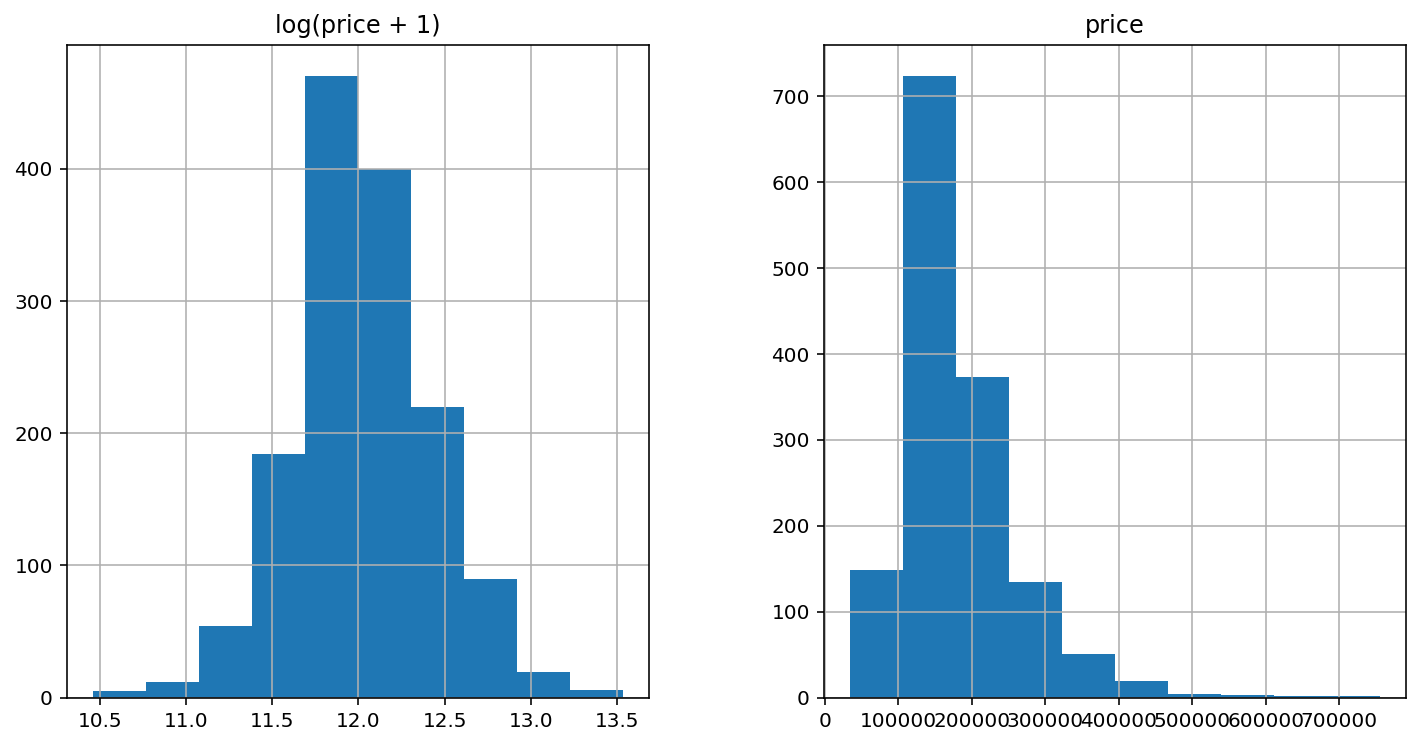

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

all_data = all_data.fillna(all_data.mean())

In [6]:
# Creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [7]:
# Cross validation RMSE function
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [8]:
# Ridge Regression with alpha=0.1
ridgeModel = Ridge(alpha=0.1)

# Score for alpha=0.1 Ridge Regression - With cross validation among 5 bins
cv_ridge = rmse_cv(ridgeModel).mean()
print(cv_ridge)

0.13777538277187878


In [9]:
# Score for alpha=0.1 Ridge Regression - No cross validation
ridgeModel.fit(X_train,y)
pred=ridgeModel.predict(X_train)
rmse_ridge = np.sqrt(mean_squared_error(y,pred))
print(rmse_ridge)

0.09211955585640513


In [10]:
# Prediction on Test set using Ridge Model with alpha=0.1
pred = ridgeModel.predict(X_test)
np.expm1(pred)

array([121519.48656871, 159637.89835116, 187900.72801905, ...,
       176763.91404077, 121610.54954924, 219174.15546004])

In [11]:
# For Submission to Kaggle
# Single Ridge Regression

ids = test['Id']
yfinalpred = ridgeModel.predict(X_test)
sale_prices = np.expm1(yfinalpred)

result = pd.DataFrame({ 'Id': ids, 'SalePrice': np.round(sale_prices, 3) })
display(result.head())

result.to_csv('submission.csv', header=['Id', 'SalePrice'], index=False)

,Id,SalePrice
0,1461,121519.487
1,1462,159637.898
2,1463,187900.728
3,1464,200719.158
4,1465,199280.935


### RMSE Score of 0.13029 on Kaggle.

### 2.3: Comparing Lasso and Ridge Regression

Ridge and Lasso regression done as single iteration and with cross-validation.

Observation: Lesser RMSE error in Lasso on account of its selecting the features that have most impact on label.

In [12]:
# Cross validation with Lasso regression model and 5 different alpha values
lassoModelCV = LassoCV(alphas = [5, 1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(lassoModelCV).mean()


/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: Fu

0.12314421090977432

In [13]:
# Cross validation with Ridge regression model and 5 different alpha values
ridgeModelCV = RidgeCV(alphas = [5, 1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(ridgeModelCV).mean()

0.1278217968244439

In [14]:
# Single Lasso Regression
lassoModel = Lasso(alpha=.1)
lassoModel.fit(X_train,y)
pred=lassoModel.predict(X_train)
rmse_lasso = np.sqrt(mean_squared_error(y,pred))
print(rmse_lasso)

0.20753905105566584


In [15]:
# R2 Score calculation against given training dataset
yrpred=ridgeModel.predict(X_train)
r2_score_ridge = r2_score(y, yrpred)
print("Ridge - R^2 on test data : %f" % r2_score_ridge)

ylpred=lassoModel.predict(X_train)
r2_score_lasso = r2_score(y, ylpred)
print("Lasso - R^2 on test data : %f" % r2_score_lasso)


Ridge - R^2 on test data : 0.946780
Lasso - R^2 on test data : 0.729869


### 2.4: L0 Norm of Lasso Regression

L0 Norm is essentially the non-zero coefficients of a Lasso regression. Since Lasso nullifies or makes zero a few coefficients that are irrelevant l0 norm gives the number of coeeficients that are the most significant for the regression.

In [16]:
# Getting coefficients of Lasso regression model
coef = pd.Series(lassoModel.coef_, index = X_train.columns)

# L0 Norm for alpha=0.1 - non-zero coefficients after applying Lasso model
sum(coef != 0)

8

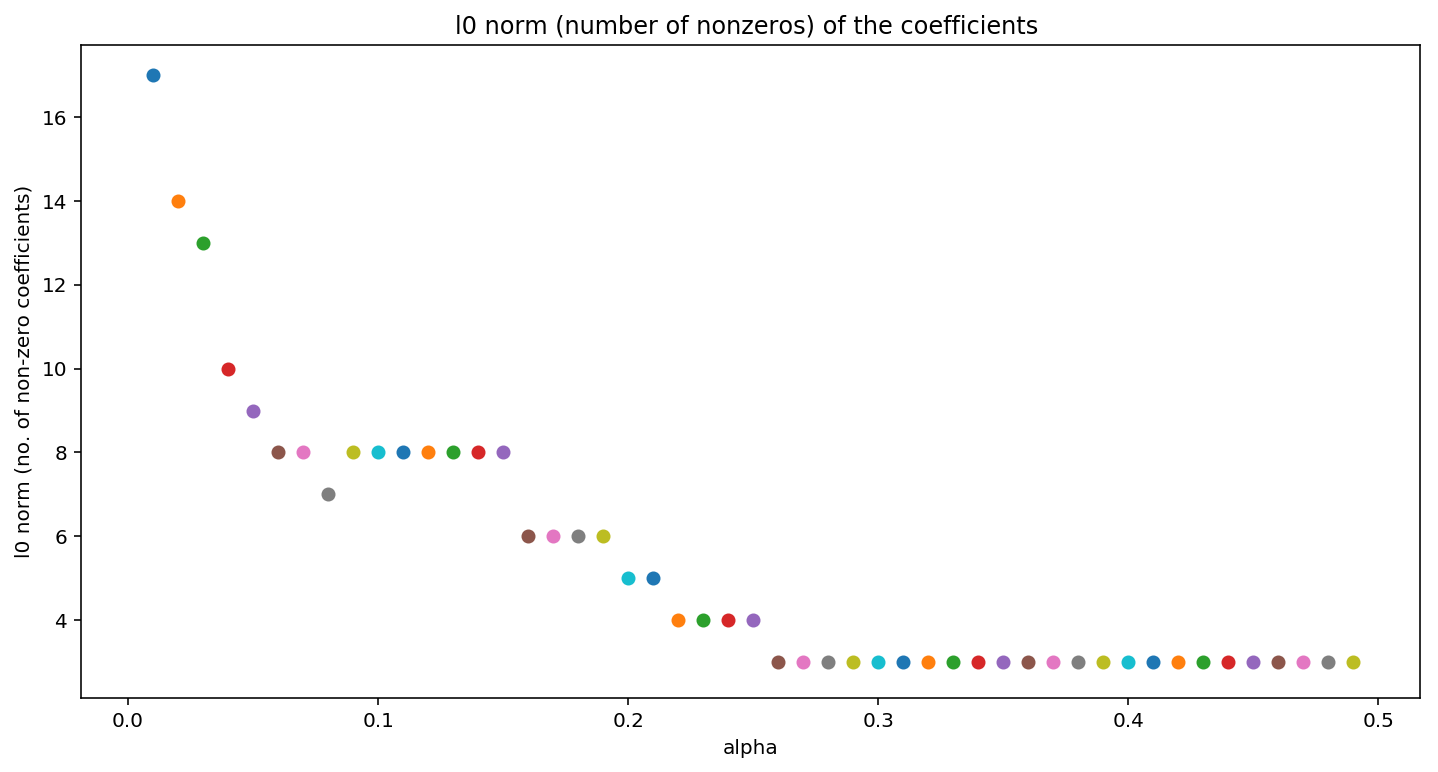

In [17]:
# Plotting the different L0 norm values for a range of alpha values

alphas = [i for i in np.arange(0.01,0.5,0.01)]
for alpha in alphas:
    lassoModel = Lasso(alpha=alpha)
    lassoModel.fit(X_train,y)
    coef = pd.Series(lassoModel.coef_, index = X_train.columns)
    x_sum = sum(coef != 0)
    plt.scatter(alpha,x_sum)
plt.title("l0 norm (number of nonzeros) of the coefficients ")
plt.xlabel("alpha")
plt.ylabel("l0 norm (no. of non-zero coefficients)")
plt.show()

We observe that with increasing value of alpha, the number of non-zero coefficients decreases, which is what regularization does, simplifies the features by elimination in case of Lasso model.

### 2.5: Ensembling and Stacking with Ridge and Lasso Regression

For ensembling and stacking we have appended the predicted Y values from Lasso and Ridge as two extra columns to our dataset and applied Ridge regression on the whole dataset of features and two y columns. This has given a slightly better R<sup>2</sup> Score.

In [21]:
# Appending the model outputs of Lasso and Ridge regressions onto dataset
new_X_train = X_train.copy()

new_X_train['LassoPred']=ylpred
new_X_train['RidgePred']=yrpred

In [16]:
new_X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LassoPred,RidgePred
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,1,0,0,0,0,1,0,12.325995,12.241886
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,1,0,0,0,0,1,0,11.990494,12.183406
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,1,0,0,0,0,1,0,12.284779,12.286281
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,1,1,0,0,0,0,0,11.956719,12.010263
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,1,0,0,0,0,1,0,12.578413,12.595739


In [22]:
# Applying Ridge model to stacked dataset

stack_ridgeModel = Ridge(alpha=.1)
stack_ridgeModel.fit(new_X_train,y)
y_ridgestack_pred=stack_ridgeModel.predict(new_X_train)
y_ridgestack_pred

array([12.24302003, 12.18578078, 12.28674395, ..., 12.55522042,
       11.86530384, 11.85771499])

In [26]:
r2_score_stack_ridge = r2_score(y, y_ridgestack_pred)
print("Stacked Ridge - R^2 on data : %f" % r2_score_stack_ridge)
print("Previous Ridge - R^2 on data : %f" % r2_score_ridge)

Stacked Ridge - R^2 on data : 0.947086
Previous Ridge - R^2 on data : 0.946780


Stacking the predicted outputs from Lasso and Ridge models on top of our dataset has given a slightly better R<sup>2</sup> Score meaning more of the variance is accounted for in this stacked Ridge Regression model.

### <center> The End </center>